In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import numpy as np



In [6]:
# Load the dataset
data = pd.read_csv(r'C:\Users\prave\Repos\ACModelling\Data\CombinedReconciledData.csv')

# Correct column names (example)
correct_columns = {
    'Property price': 'Property price (USD)', 
    'Price per living area unit': 'Price per living area unit (USD)'
}

data.rename(columns=correct_columns, inplace=True)

# Data preprocessing - handle missing values and encode categorical variables if necessary
data = data.dropna(subset=['AC'])  # Ensuring there are no missing values in the target

# Feature Combinations
feature_sets = {
    'Basic Features': ['Living area', 'Bedrooms', 'Bathrooms', 'Longitude', 'Latitude'],
    'Economic and Size Features': ['Property price (USD)', 'Price per living area unit (USD)', 'Lot/land area'],
    'Geographical Features': ['Longitude', 'Latitude'],
    'Full Feature Set': list(data.select_dtypes(include=[np.number]).columns.drop('AC'))
}

results = {}

# Evaluate each feature set
for name, features in feature_sets.items():
    data_subset = data[features + ['AC']].dropna()
    X = data_subset[features]
    y = data_subset['AC']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a logistic regression pipeline with scaling and imputation
    pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        LogisticRegression(random_state=42)
    )
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate the model
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
for name, acc in results.items():
    print(f"Accuracy with {name}: {acc:.2f}")

Accuracy with Basic Features: 0.96
Accuracy with Economic and Size Features: 0.96
Accuracy with Geographical Features: 0.93
Accuracy with Full Feature Set: 0.97


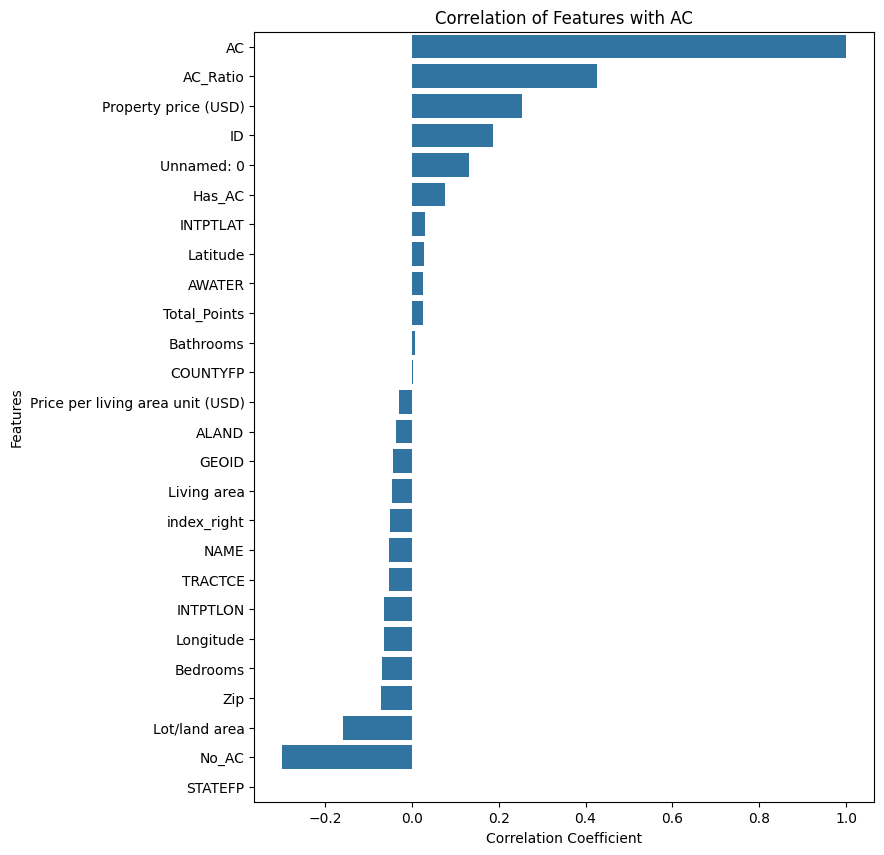

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\prave\Repos\ACModelling\Data\CombinedReconciledData.csv')

# Optionally correct column names if there are discrepancies
correct_columns = {
    'Property price': 'Property price (USD)', 
    'Price per living area unit': 'Price per living area unit (USD)'
}
data.rename(columns=correct_columns, inplace=True)

# Select numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix with focus on 'AC'
correlation_with_ac = numerical_data.corr()['AC'].sort_values(ascending=False)

# Plotting the correlations with 'AC'
plt.figure(figsize=(8, 10))
sns.barplot(x=correlation_with_ac.values, y=correlation_with_ac.index)
plt.title('Correlation of Features with AC')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [11]:
print(data.columns)


Index(['Unnamed: 0', 'ID', 'Property price (USD)', 'Sold date (MM/DD/YYYY)',
       'Address', 'Living area', 'Living area unit',
       'Price per living area unit (USD)', 'Lot/land area',
       'Lot/land area unit', 'Bedrooms', 'Bathrooms', 'Street address', 'City',
       'Zip', 'AC', 'FormattedAddress', 'Longitude', 'Latitude', 'coordinates',
       'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry', 'No_AC', 'Has_AC', 'Total_Points', 'AC_Ratio'],
      dtype='object')


In [12]:
columns_to_keep = ['Property price (USD)', 'Sold date (MM/DD/YYYY)', 'Address', 'Living area', 'Living area unit', 'Price per living area unit (USD)', 'Lot/land area', 'Lot/land area unit', 'Bedrooms', 'Bathrooms', 'Street address', 'coordinates', 'AC', 'GEOID']
data_subset = data[columns_to_keep]


C:\Users\prave\AppData\Local\Temp\ipykernel_2428\1922194565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Lot/land area'] = pd.to_numeric(data_subset['Lot/land area'], errors='coerce')
C:\Users\prave\AppData\Local\Temp\ipykernel_2428\1922194565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Property price (USD)'] = pd.to_numeric(data_subset['Property price (USD)'], errors='coerce')
C:\Users\prave\AppData\Local\Temp\ipykernel_2428\1922194565.py:4: SettingWithCopyWarning: 

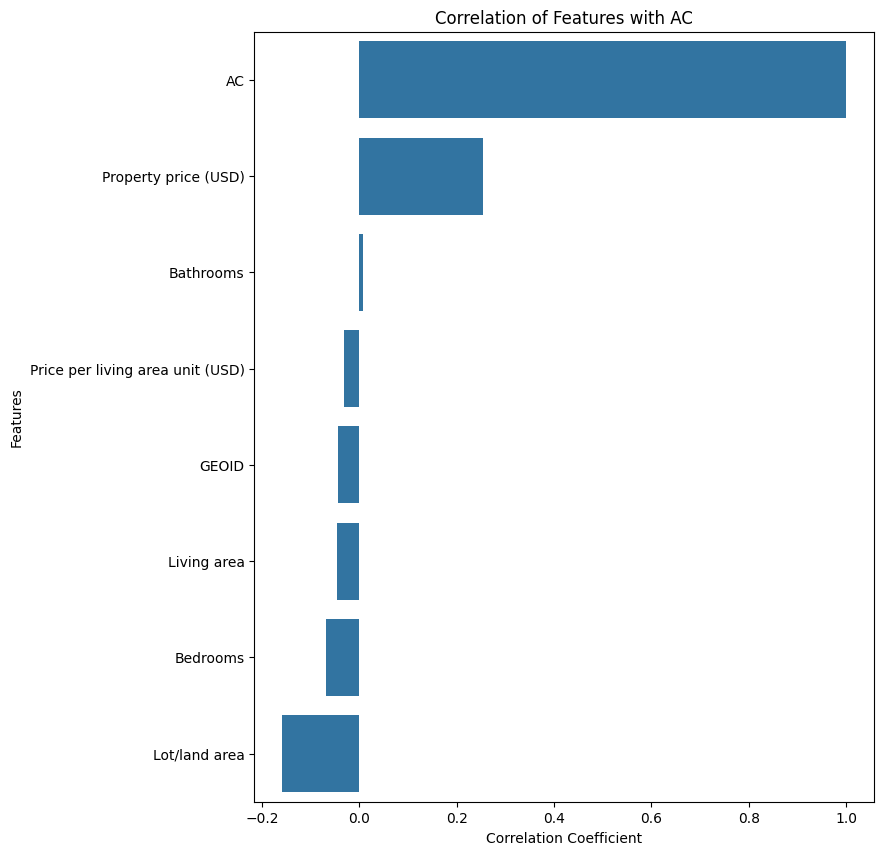

In [13]:
# Convert any necessary columns to numeric if they are not already. For example, converting 'Lot/land area' if it's a string
data_subset['Lot/land area'] = pd.to_numeric(data_subset['Lot/land area'], errors='coerce')
data_subset['Property price (USD)'] = pd.to_numeric(data_subset['Property price (USD)'], errors='coerce')
data_subset['Living area'] = pd.to_numeric(data_subset['Living area'], errors='coerce')
data_subset['Price per living area unit (USD)'] = pd.to_numeric(data_subset['Price per living area unit (USD)'], errors='coerce')
data_subset['Bedrooms'] = pd.to_numeric(data_subset['Bedrooms'], errors='coerce')
data_subset['Bathrooms'] = pd.to_numeric(data_subset['Bathrooms'], errors='coerce')

# Select numerical columns for correlation analysis
numerical_data = data_subset.select_dtypes(include=[np.number])

# Compute the correlation matrix with focus on 'AC'
correlation_with_ac = numerical_data.corr()['AC'].sort_values(ascending=False)

# Plotting the correlations with 'AC'
plt.figure(figsize=(8, 10))
sns.barplot(x=correlation_with_ac.values, y=correlation_with_ac.index)
plt.title('Correlation of Features with AC')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [20]:
numeric_data = data_subset.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()


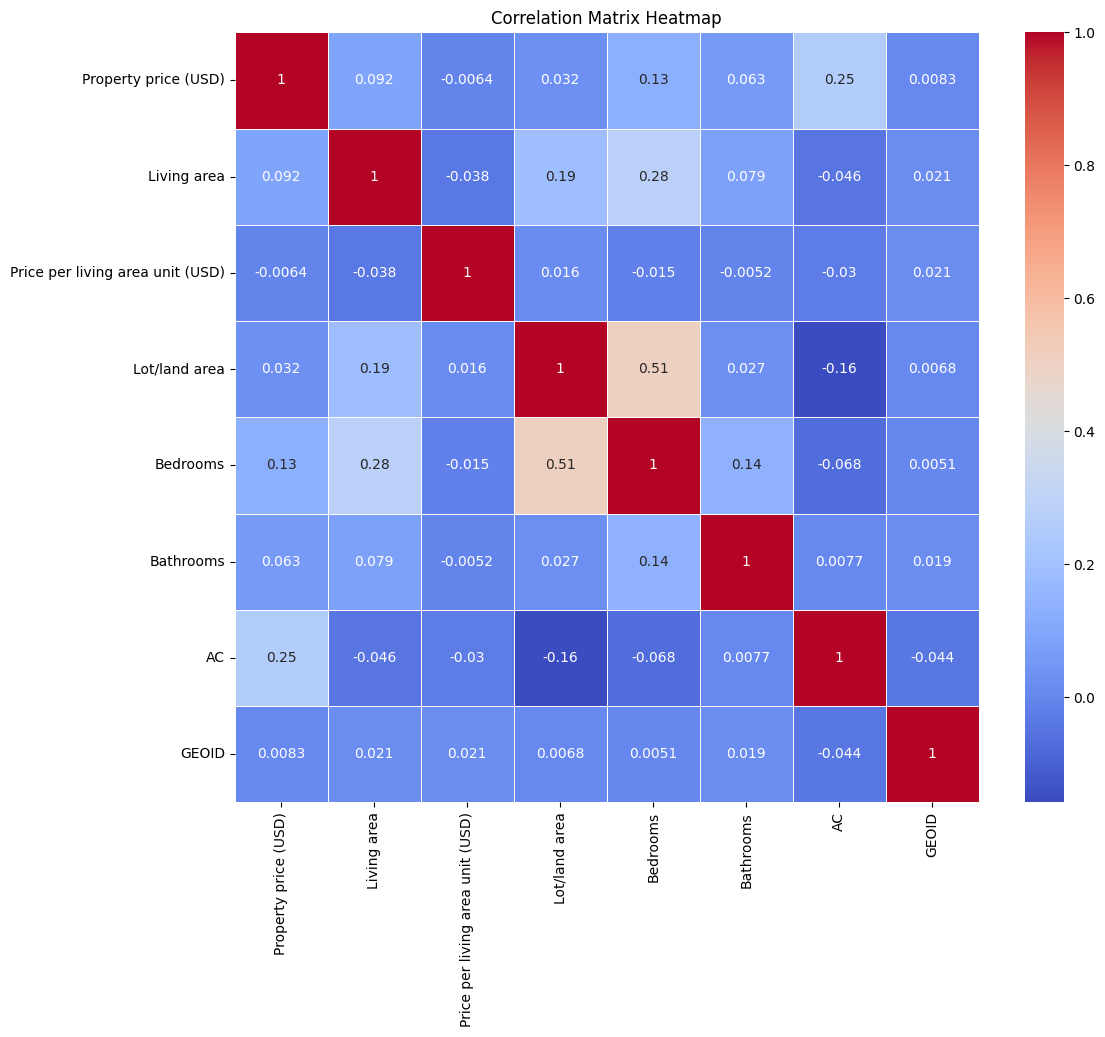

In [21]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train and X_test are your feature matrices, and y_train and y_test are the corresponding labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
